# DL Project on Loan_Prediction.csv 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 
from sklearn.metrics import classification_report 

In [2]:
df = pd.read_csv('Loan_Train.csv')

## EDA:

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Preprocessing:

- Column Loan_ID, we can drop, as it will not help 
predicting Target.

In [6]:
df.drop(columns='Loan_ID',axis=1, inplace=True)

- Now we have 12 columns in our dataframe.
- In dependent column, values are numeric but datatype is showing Object. So, lets check the unique values it has. 

In [7]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

- We can see here 3+ is not numeric value. So lets change this value to 3 and change the datatype of column to float.

In [8]:
df.replace({"Dependents":{'3+':3},"Loan_Status":{'Y':1,'N':0}},inplace=True)

In [9]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [10]:
df['Dependents'].dtype

dtype('O')

In [11]:
df['Dependents'] = df['Dependents'].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 57.7+ KB


In [13]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [14]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.isna().sum()/df.shape[0]*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [16]:
df.corr()['Loan_Status']

Dependents           0.006781
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

- Among numeric columns, credit history has the best correlation with Target.
## Encoding

In [17]:
df.tail(7)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
607,Male,Yes,2.0,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,1
608,Male,Yes,0.0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


In [18]:
df.replace({"Gender":{'Female':0,'Male':1},"Married":{'Yes':1,'No':0},"Education":{'Not Graduate':0,'Graduate':1},
            "Self_Employed":{'No':0,'Yes':1},"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


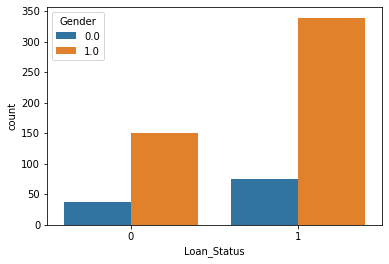

In [20]:
sns.countplot(data = df, x='Loan_Status',hue='Gender')

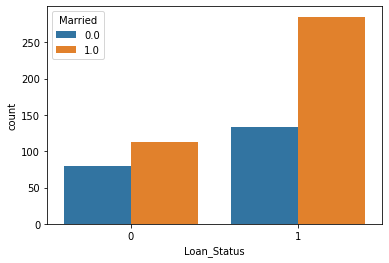

In [21]:
sns.countplot(data = df, x='Loan_Status',hue='Married')

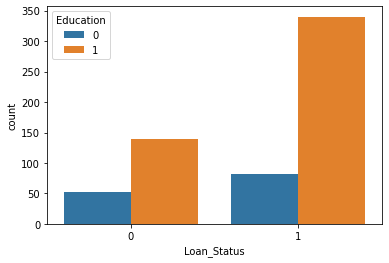

In [22]:
sns.countplot(data = df, x='Loan_Status',hue='Education')

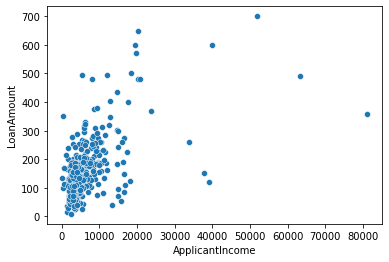

In [23]:
sns.scatterplot(data = df, x='ApplicantIncome',y='LoanAmount')          

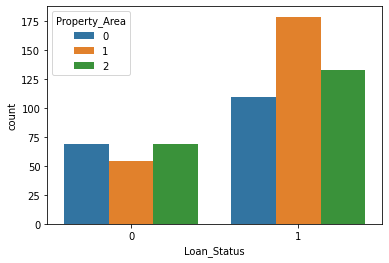

In [24]:
sns.countplot(data = df, x='Loan_Status',hue='Property_Area')

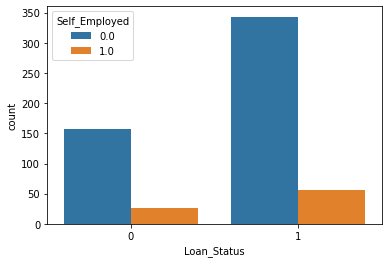

In [25]:
sns.countplot(data = df, x='Loan_Status',hue='Self_Employed')

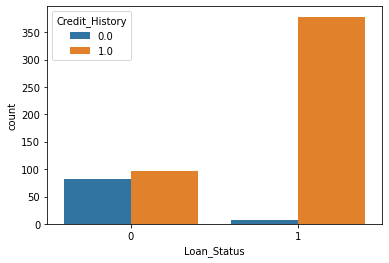

In [26]:
sns.countplot(data = df, x='Loan_Status',hue='Credit_History')

In [27]:
df.corr()['Loan_Status']

Gender               0.019857
Married              0.089280
Dependents           0.006781
Education            0.085884
Self_Employed       -0.002303
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [28]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Now, we have all columns in numeric datatype.
## Handling Null Values:
1. Gender, married, dependent, loan amount term columns has less than 3% null values so we can delete the rows having null values.
2. Loan_ID, Education, Applicant Income, Coapplicant income, property area, loan_status are the columns with No null values.
3. We will have to fill null values of columns: Self_Employed, Loan Amount, Credit_History. As there are 5.21,3.58,8.14 percent null values accordingly.


In [29]:
#Dropping null rows of column Gender
df[df['Gender'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,1.0,2.0,0,0.0,3365,1917.0,112.0,360.0,0.0,0,0
126,NaN,1.0,3.0,1,0.0,23803,0.0,370.0,360.0,1.0,0,1
171,NaN,1.0,3.0,1,0.0,51763,0.0,700.0,300.0,1.0,2,1
188,NaN,1.0,0.0,1,1.0,674,5296.0,168.0,360.0,1.0,0,1
314,NaN,1.0,0.0,1,0.0,2473,1843.0,159.0,360.0,1.0,0,0
334,NaN,1.0,1.0,1,1.0,9833,1833.0,182.0,180.0,1.0,2,1
460,NaN,1.0,0.0,1,1.0,2083,4083.0,160.0,360.0,NaN,1,1
467,NaN,1.0,0.0,1,0.0,16692,0.0,110.0,360.0,1.0,1,1
477,NaN,1.0,2.0,1,0.0,2873,1872.0,132.0,360.0,0.0,1,0
507,NaN,0.0,0.0,1,0.0,3583,0.0,96.0,360.0,1.0,2,0


In [30]:
df.drop([23,126,171,188,314,334,460,467,477,507,576,588,592],inplace=True)

In [31]:
df['Gender'].isna().sum()

0

In [32]:
#Dropping null rows of column married
df[df['Married'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,1.0,NaN,NaN,1,0.0,3816,754.0,160.0,360.0,1.0,2,1
228,1.0,NaN,NaN,1,0.0,4758,0.0,158.0,480.0,1.0,1,1
435,0.0,NaN,NaN,1,0.0,10047,0.0,NaN,240.0,1.0,1,1


In [33]:
df.drop([104,228,435],inplace=True)

In [34]:
df['Married'].isna().sum()

0

In [35]:
#Dropping null rows of column Dependents           
df[df['Dependents'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,1.0,1.0,NaN,1,0.0,13650,0.0,NaN,360.0,1.0,2,1
120,1.0,1.0,NaN,1,0.0,5667,2667.0,180.0,360.0,1.0,0,1
226,1.0,1.0,NaN,0,1.0,4735,0.0,138.0,360.0,1.0,2,0
293,0.0,0.0,NaN,1,0.0,5417,0.0,143.0,480.0,0.0,2,0
301,1.0,1.0,NaN,0,0.0,2875,1750.0,105.0,360.0,1.0,1,1
332,1.0,0.0,NaN,1,0.0,2833,0.0,71.0,360.0,1.0,2,1
335,1.0,1.0,NaN,1,1.0,5503,4490.0,70.0,NaN,1.0,1,1
346,1.0,1.0,NaN,0,0.0,3523,3230.0,152.0,360.0,0.0,0,0
355,0.0,0.0,NaN,1,0.0,3813,0.0,116.0,180.0,1.0,2,1
517,1.0,1.0,NaN,0,0.0,3074,1800.0,123.0,360.0,0.0,1,0


In [36]:
df.drop([102,120,226,293,301,332,335,346,355,517,571,597],inplace=True)

In [37]:
df['Dependents'].isna().sum()

0

In [38]:
#Dropping null rows of Loan_Amount_Term                
df[df['Loan_Amount_Term'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,1.0,1.0,0.0,1,NaN,2600,3500.0,115.0,NaN,1.0,2,1
36,1.0,1.0,0.0,1,0.0,1828,1330.0,100.0,NaN,0.0,2,0
44,1.0,1.0,0.0,0,1.0,4695,0.0,96.0,NaN,1.0,2,1
45,0.0,0.0,0.0,1,0.0,3410,0.0,88.0,NaN,1.0,2,1
73,1.0,1.0,3.0,0,0.0,4755,0.0,95.0,NaN,0.0,1,0
112,1.0,1.0,0.0,0,0.0,3572,4114.0,152.0,NaN,0.0,0,0
165,1.0,1.0,0.0,1,0.0,3707,3166.0,182.0,NaN,1.0,0,1
197,0.0,0.0,0.0,0,0.0,1907,2365.0,120.0,NaN,1.0,2,1
223,1.0,1.0,0.0,1,0.0,7578,1010.0,175.0,NaN,1.0,1,1
232,1.0,0.0,0.0,0,0.0,3189,2598.0,120.0,NaN,1.0,0,1


In [39]:
df.drop([19,36,44,45,73,112,165,197,223,232,367,421,423],inplace=True)

In [40]:
df['Loan_Amount_Term'].isna().sum()

0

#### Filling null values of column LoanAmount by mean



In [41]:
#Imputing column LoanAmount
df['LoanAmount'].isna().sum()

20

In [42]:
LAmean = df['LoanAmount'].mean()
df['LoanAmount'].fillna(LAmean, inplace=True)

In [43]:
df['LoanAmount'].isna().sum()

0

In [44]:
df = df.dropna(axis=0, subset=['Self_Employed'])

In [45]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

- Credit_History has highest corr value with target.
- There are 8.14 % null values in the column, so will should fill null values instead of dropping rows. Also, this column has categorical data.
- Trying to fill null values by predicting them using KNN model.
#### Filling null values of Crdit_History column by prediction using KNN algorithm

In [46]:
# Created new dataframe without null values of credit_history
df_CRHS = df.dropna(axis=0, subset=['Credit_History'])

In [47]:
df_CRHS.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [48]:
# Seperated Credit_History column for making predictions
x_crhs = df_CRHS.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]]
y_crhs = df_CRHS.iloc[:,9]

In [49]:
from sklearn.model_selection import train_test_split
x_ctrain, x_ctest, y_ctrain, y_ctest = train_test_split(x_crhs,y_crhs, test_size = 0.3, random_state=1)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_c = KNeighborsClassifier(n_neighbors=9)
knn_c.fit(x_ctrain,y_ctrain)
y_cpred = knn_c.predict(x_ctest)  

from sklearn.metrics import accuracy_score,classification_report
print(f"Accuracy Score:{accuracy_score(y_ctest,y_cpred)}\n\n")
print(classification_report(y_ctest,y_cpred))

Accuracy Score:0.8466666666666667


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        23
         1.0       0.85      1.00      0.92       127

    accuracy                           0.85       150
   macro avg       0.42      0.50      0.46       150
weighted avg       0.72      0.85      0.78       150



In [51]:
#Predicting Null values of credit_history
df_CRHS_new = df.iloc[:,:]

In [52]:
df_CRHS_new.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
df_CRHS_new_test = df_CRHS_new[df_CRHS_new['Credit_History'].isna()]

In [54]:
x_df_CRHS_test = df_CRHS_new_test.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]]
y_df_CRHS_test = pd.DataFrame(df_CRHS_new_test.iloc[:,9])

In [55]:
#Predicted NULL Values of Credit history
y_df_CRHS_pred = knn_c.predict(x_df_CRHS_test)

In [56]:
y_df_CRHS_test['Credit_History'] = y_df_CRHS_pred

In [57]:
df_CRHS_fna = pd.concat( [x_df_CRHS_test, y_df_CRHS_test] , axis=1) #this is the dataset of Credit History without null values

In [58]:
x_df_CRHS_test.shape

(43, 11)

In [59]:
y_df_CRHS_test.shape

(43, 1)

In [60]:
df.shape

(542, 12)

- Splitting dataframe

In [61]:
df_null = df[df['Credit_History'].isna()]

In [62]:
mask = df.notnull() # this gives boolean values w.r.t null

df_all = df.where(mask).dropna()

In [63]:
df_new = pd.concat([df_all, df_CRHS_fna], axis=0)

In [64]:
df_new.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### - Finally we got dataframe without null values

In [65]:
# Splitting data for training and testing
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split (x, y, test_size=0.25, random_state=1)

## Applying ANN on dataset

In [68]:
#step1: Initialise ANN model
ann = Sequential()

#step2: Add layers
ann.add (Dense (units = 12, activation ='relu')) #hidden layer: relu=rectified linear unit
ann.add (Dense (units = 12, activation ='relu'))
ann.add (Dense (units = 1, activation ='sigmoid')) #output layer:

#step3: Establish connection between layers
ann.compile (optimizer ='adam', loss='binary_crossentropy') #adam=advance version of gradient descent

#step4: train the model
ann.fit (xtrain, ytrain, batch_size = 10, epochs = 100,validation_data= (xtest, ytest))

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.6683 - val_loss: 0.6533
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6190 - val_loss: 0.6524
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5909 - val_loss: 0.6572
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5708 - val_loss: 0.6574
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5558 - val_loss: 0.6634
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5425 - val_loss: 0.6595
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5310 - val_loss: 0.6553
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5192 - val_loss: 0.6503
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5083 - val_loss: 0.6424
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4987 - val_loss: 0.6393
Epoch 11/

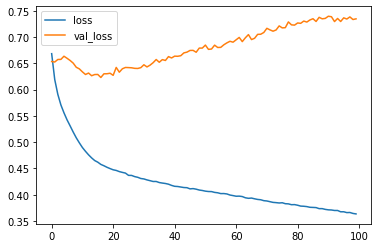

In [69]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [70]:
#step5: make predictions
ypred = ann.predict(xtest)

#step6: set the threshold
ypred = ypred > 0.5

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        55
           1       0.72      0.96      0.83        81

    accuracy                           0.76       136
   macro avg       0.81      0.71      0.71       136
weighted avg       0.79      0.76      0.74       136



In [72]:
df_new['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

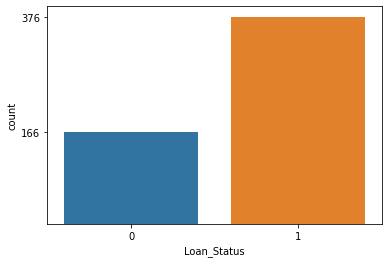

In [73]:
sns.countplot(data=df,x="Loan_Status")
c=df["Loan_Status"].value_counts()
plt.yticks(c)
plt.show()

In [74]:
from imblearn.over_sampling import RandomOverSampler

In [75]:
#apply sampling technique 
#Oversampler
#create object of  RandomOverSampler() class
ros = RandomOverSampler() 
#increase records of minority class here yes is minority class 

In [76]:
#apply randomoversampling for balance
xtrain1,ytrain1=ros.fit_resample(xtrain,ytrain)

In [77]:
pd.Series(ytrain1).value_counts()

1    295
0    295
Name: Loan_Status, dtype: int64

In [78]:
#step1: Initialise ANN model
ann = Sequential()

#step2: Add layers
ann.add (Dense (units = 5, activation ='relu')) #hidden layer: relu=rectified linear unit
ann.add (Dense (units = 5, activation ='relu'))
ann.add (Dense (units = 1, activation ='sigmoid')) #output layer:

#step3: Establish connection between layers
ann.compile (optimizer ='adam', loss='binary_crossentropy') #adam=advance version of gradient descent

#step4: train the model
ann.fit (xtrain1, ytrain1, batch_size = 10, epochs = 100,validation_data=(xtest,ytest))

Epoch 1/100
59/59 [==============================] - 1s 4ms/step - loss: 0.7014 - val_loss: 0.6842
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6952 - val_loss: 0.6829
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6910 - val_loss: 0.6822
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6873 - val_loss: 0.6813
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6838 - val_loss: 0.6784
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6805 - val_loss: 0.6753
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6768 - val_loss: 0.6713
Epoch 8/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6733 - val_loss: 0.6685
Epoch 9/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6696 - val_loss: 0.6650
Epoch 10/100
59/59 [==============================] - 0s 2ms/step - loss: 0.6658 - val_loss: 0.6614
Epoch 11/

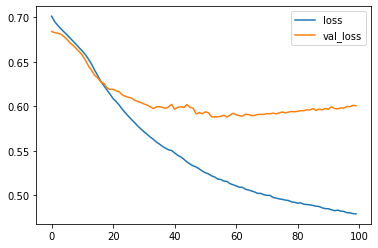

In [79]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [80]:
#step5: make predictions
ypred = ann.predict(xtest)

#step6: set the threshold
ypred = ypred > 0.5

In [81]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63        55
           1       0.74      0.85      0.79        81

    accuracy                           0.74       136
   macro avg       0.73      0.71      0.71       136
weighted avg       0.73      0.74      0.73       136



## Using Earlystop

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=3, patience= 25)
ann.fit(xtrain1, ytrain1, epochs=300,  validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/300
19/19 [==============================] - 0s 5ms/step - loss: 0.4760 - val_loss: 0.6000
Epoch 2/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4758 - val_loss: 0.6000
Epoch 3/300
19/19 [==============================] - 0s 5ms/step - loss: 0.4757 - val_loss: 0.6005
Epoch 4/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4757 - val_loss: 0.6012
Epoch 5/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4756 - val_loss: 0.6023
Epoch 6/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4755 - val_loss: 0.6028
Epoch 7/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4753 - val_loss: 0.6035
Epoch 8/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4749 - val_loss: 0.6036
Epoch 9/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4751 - val_loss: 0.6029
Epoch 10/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4745 - val_loss: 0.6037
Epoch 11/

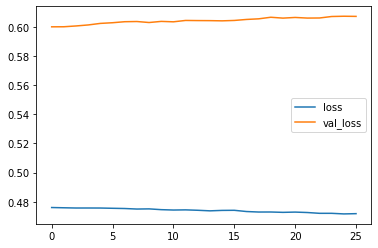

In [83]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [84]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63        55
           1       0.74      0.85      0.79        81

    accuracy                           0.74       136
   macro avg       0.73      0.71      0.71       136
weighted avg       0.73      0.74      0.73       136



In [85]:
from tensorflow.keras.layers import Dropout

In [86]:
#step1: Initialise ANN model
ann = Sequential()

#step2: Add layers
ann.add (Dense (units = 40, activation ='relu')) #hidden layer: relu=rectified linear unit
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 20, activation ='relu'))
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 20, activation ='relu'))
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 12, activation ='relu'))
ann.add(Dropout(rate=0.2))


ann.add (Dense (units = 1, activation ='sigmoid')) #output layer:

#step3: Establish connection between layers
ann.compile (optimizer ='rmsprop', loss='binary_crossentropy') #adam=advance version of gradient descent

#step4: train the model
ann.fit (xtrain1, ytrain1, batch_size = 5, epochs = 50,validation_data=(xtest,ytest))

Epoch 1/50
118/118 [==============================] - 1s 3ms/step - loss: 0.7033 - val_loss: 0.6933
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 0.6925 - val_loss: 0.6835
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6682 - val_loss: 0.6586
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6511 - val_loss: 0.6215
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.6118 - val_loss: 0.5850
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5882 - val_loss: 0.5696
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5749 - val_loss: 0.5661
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5689 - val_loss: 0.5689
Epoch 9/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5790 - val_loss: 0.5593
Epoch 10/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5605 - val_loss: 0.5615

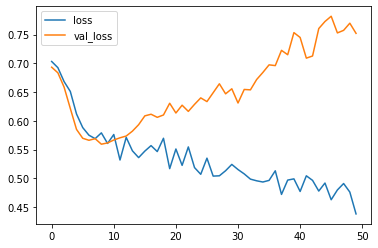

In [87]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [88]:
#step5: make predictions
ypred = ann.predict(xtest)

#step6: set the threshold
ypred = ypred > 0.5

In [89]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.77      0.55      0.64        55
           1       0.74      0.89      0.81        81

    accuracy                           0.75       136
   macro avg       0.76      0.72      0.72       136
weighted avg       0.75      0.75      0.74       136



In [90]:
#step1: Initialise ANN model
ann = Sequential()

#step2: Add layers
ann.add (Dense (units = 40, activation ='relu')) #hidden layer: relu=rectified linear unit
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 30, activation ='relu'))
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 20, activation ='relu'))
ann.add(Dropout(rate=0.2))

ann.add (Dense (units = 12, activation ='relu'))
ann.add(Dropout(rate=0.2))


ann.add (Dense (units = 1, activation ='sigmoid')) #output layer:

#step3: Establish connection between layers
ann.compile (optimizer ='adam', loss='binary_crossentropy') #adam=advance version of gradient descent

#step4: train the model
ann.fit (xtrain1, ytrain1, batch_size = 10, epochs = 50,validation_data=(xtest,ytest))

Epoch 1/50
59/59 [==============================] - 1s 5ms/step - loss: 0.6790 - val_loss: 0.6441
Epoch 2/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6343 - val_loss: 0.5956
Epoch 3/50
59/59 [==============================] - 0s 3ms/step - loss: 0.6257 - val_loss: 0.5731
Epoch 4/50
59/59 [==============================] - 0s 3ms/step - loss: 0.6114 - val_loss: 0.5546
Epoch 5/50
59/59 [==============================] - 0s 3ms/step - loss: 0.5901 - val_loss: 0.5473
Epoch 6/50
59/59 [==============================] - 0s 3ms/step - loss: 0.5741 - val_loss: 0.5386
Epoch 7/50
59/59 [==============================] - 0s 3ms/step - loss: 0.5726 - val_loss: 0.5421
Epoch 8/50
59/59 [==============================] - 0s 3ms/step - loss: 0.5729 - val_loss: 0.5365
Epoch 9/50
59/59 [==============================] - 0s 3ms/step - loss: 0.5614 - val_loss: 0.5352
Epoch 10/50
59/59 [==============================] - 0s 3ms/step - loss: 0.5411 - val_loss: 0.5328
Epoch 11/50
59/59 [

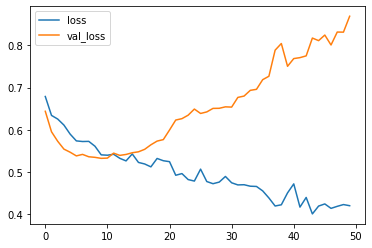

In [91]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [92]:
#step5: make predictions
ypred = ann.predict(xtest)

#step6: set the threshold
ypred = ypred > 0.5

In [93]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68        55
           1       0.76      0.94      0.84        81

    accuracy                           0.79       136
   macro avg       0.81      0.75      0.76       136
weighted avg       0.80      0.79      0.78       136

